In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("winequality-red.csv", sep=";")  # The dataset uses ";" as a separator

# Display the first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Check the number of rows and columns
print("Dataset shape:", df.shape)

# Get column names
print("\nColumn names:", df.columns)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (1599, 12)

Column names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Summary statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      densi

In [3]:
print(df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


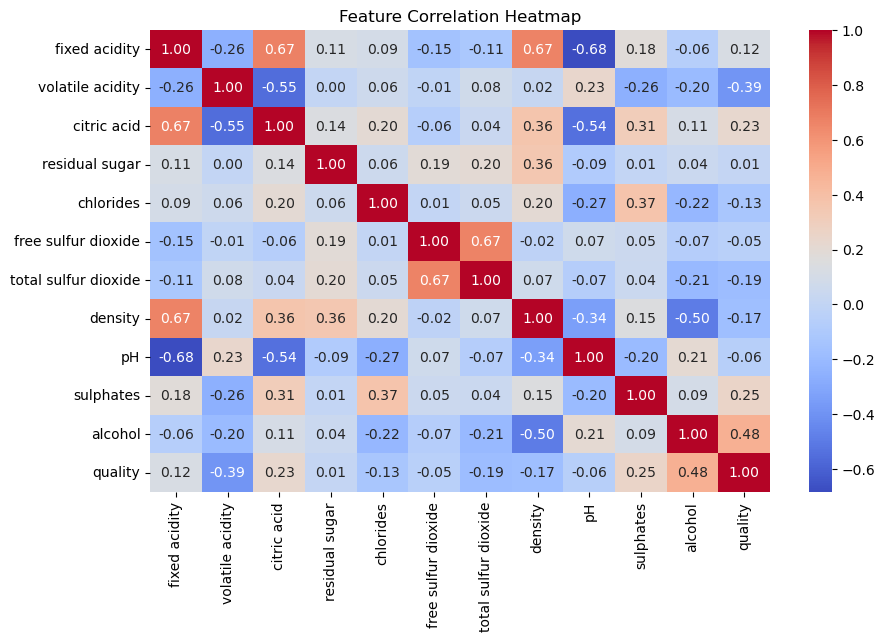

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\16477\AppData\Local\Temp\ipykernel_13856\141887608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["quality"], palette="viridis")


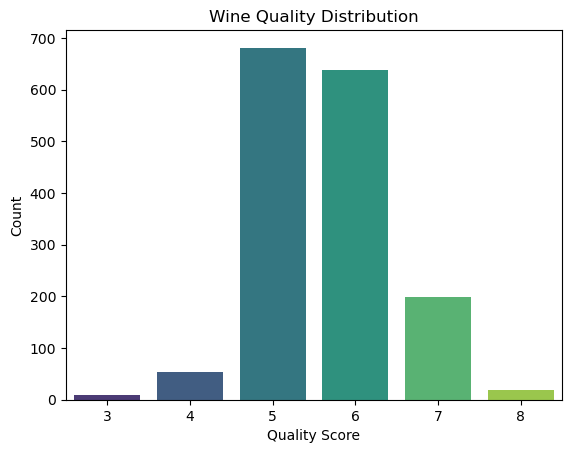

In [5]:
sns.countplot(x=df["quality"], palette="viridis")
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

In [7]:
# Define features and target variable
X = df.drop(columns=["quality"])  # Drop 'quality' to get only features
y = df["quality"]  # Target variable (wine quality)

In [8]:
# Convert wine quality into binary classification
y = y.apply(lambda q: 1 if q >= 6 else 0)  # 1 for high quality, 0 for low quality

# Check distribution
print(y.value_counts())

quality
1    855
0    744
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Scale features

# Convert back to DataFrame for readability
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display first few rows after scaling
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [10]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check dataset sizes
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 1279
Testing set size: 320


In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Print first 10 predictions
print("Predicted values:", y_pred[:10])

Predicted values: [0 1 0 0 1 1 0 0 0 1]


In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report (includes precision, recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       149
           1       0.77      0.74      0.75       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       149
           1       0.83      0.80      0.82       171

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [15]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to test
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'max_iter': [100, 200, 300]  # Maximum iterations
}

# Initialize grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Train multiple models with different parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'max_iter': 100}
Best Accuracy: 0.7427910539215686


In [16]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10]  # Minimum samples to split
}

# Initialize Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

# Train multiple models with different parameters
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.8084405637254901


In [17]:
import joblib

# Save the best Random Forest model
joblib.dump(grid_search_rf.best_estimator_, "random_forest_wine_model.pkl")

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [18]:
# Load the saved Random Forest model
loaded_rf_model = joblib.load("random_forest_wine_model.pkl")

# Take a sample wine from the test set
sample_wine = X_test.iloc[0].values.reshape(1, -1)  # Reshape for prediction

# Predict quality
prediction = loaded_rf_model.predict(sample_wine)

print("Predicted wine quality (0 = low, 1 = high):", prediction[0])


Predicted wine quality (0 = low, 1 = high): 0


C:\Users\16477\anaconda3\envs\wine-ml\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
